**Logistic Regression**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [12]:
# Load the merged data
df = pd.read_csv("merged.csv")

# Convert 'NoEvent', 'Unknown', 'Not Applicable' to 0
df.replace(["NoEvent", "Unknown", "Not Applicable"], 0, inplace=True)

#Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("\n🧾 Here are all your cleaned column names:\n")
print(df.columns.tolist())



🧾 Here are all your cleaned column names:

['ee_#', 'job_title', 'current_employment_status', 'project', 'project_code', 'original_hire_date', 'last_hire_date', 'los_in_days', 'termination_date', 'reason_code', 'left', 'fired', 'promotion_date', 'demotion_date', 'rehire_date', 'transfer_in_date', 'transfer_out_date', 'days_since_promotion', 'days_since_demotion', 'days_since_rehire', 'days_since_transfer_in', 'days_since_transfer_out', 'days_since_termination', 'flsa_exempt']


In [17]:
# Encode categorical features
categorical_cols = ['job_title', 'project_code', 'flsa_exempt']
for col in categorical_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    else:
        print(f"⚠️ Column '{col}' not found in dataset — skipping.")

# Create churn column based on 'left' and 'fired'
df['churn'] = ((df['left'] == 1) | (df['fired'] == 1)).astype(int)

# Check class distribution
print(df['churn'].value_counts())

# Select features
features = ['days_since_promotion', 'days_since_demotion', 'days_since_transfer_in',
            'days_since_transfer_out', 'days_since_rehire', 'job_title',
            'project_code', 'flsa_exempt', 'los_in_days']
X = df[features].apply(pd.to_numeric, errors='coerce').fillna(0)
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


churn
0    7242
1    5122
Name: count, dtype: int64
Confusion Matrix:
 [[1915  243]
 [1233  319]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.89      0.72      2158
           1       0.57      0.21      0.30      1552

    accuracy                           0.60      3710
   macro avg       0.59      0.55      0.51      3710
weighted avg       0.59      0.60      0.55      3710


Accuracy Score: 0.6021563342318059


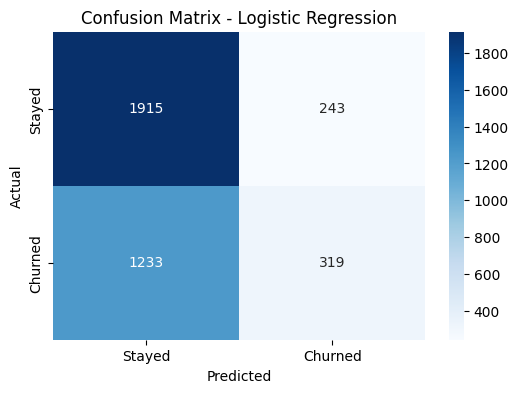

<ipython-input-18-c7fe963fc8f9>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


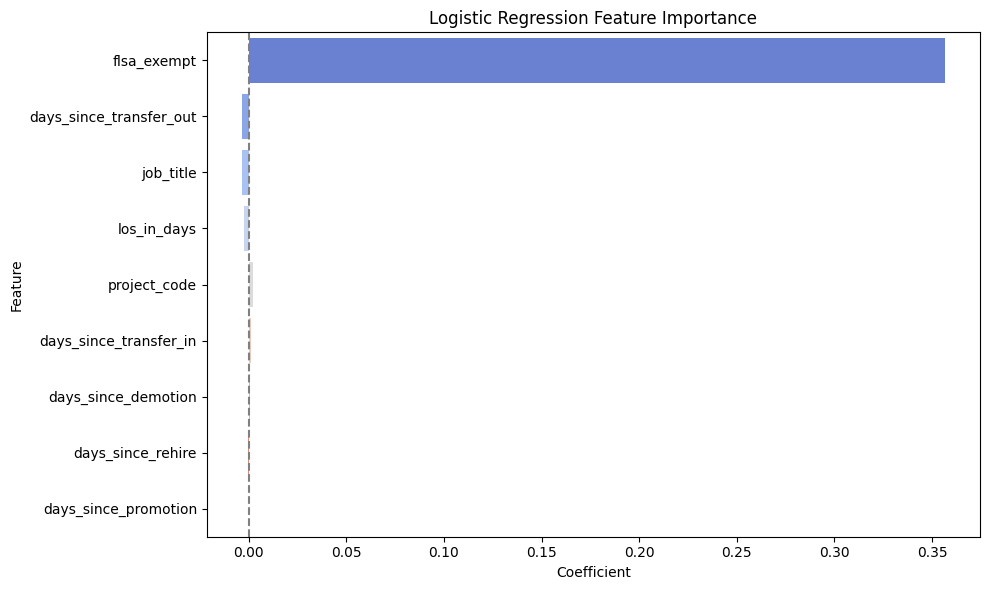

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Confusion Matrix Visualization ---
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- 2. Feature Importance (Coefficients Plot) ---
coefficients = lr_model.coef_[0]
feature_names = X.columns

# Create a dataframe for better plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Logistic Regression Feature Importance')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()